In [1]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 29.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=29bd95affd65d8691bd4d9c830ee46021b9c4d95e96b7fcf68f3c40359a4a70a
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling p

### Import Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score
import xgboost as xgb
from ydata_profiling import ProfileReport

### Fetching Data

In [3]:
netflix = yf.Ticker('NFLX')

In [4]:
netflix_data = netflix.history(period='15y')

In [5]:
df = pd.DataFrame(netflix_data)

### Exploratory Data Analysis(EDA)

In [6]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-03-30 00:00:00-04:00,5.644286,6.048571,5.578571,6.004286,19396300,0.0,0.0
2009-03-31 00:00:00-04:00,6.030000,6.281429,5.952857,6.131429,12718300,0.0,0.0
2009-04-01 00:00:00-04:00,6.111429,6.282857,6.017143,6.124286,10427900,0.0,0.0
2009-04-02 00:00:00-04:00,6.252857,6.275714,6.141429,6.161429,11048800,0.0,0.0
2009-04-03 00:00:00-04:00,6.152857,6.264286,6.081429,6.152857,7205800,0.0,0.0


In [7]:
df.reset_index(inplace=True)

In [8]:
df.shape

(3776, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3776 entries, 0 to 3775
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                           
 0   Date          3776 non-null   datetime64[ns, America/New_York]
 1   Open          3776 non-null   float64                         
 2   High          3776 non-null   float64                         
 3   Low           3776 non-null   float64                         
 4   Close         3776 non-null   float64                         
 5   Volume        3776 non-null   int64                           
 6   Dividends     3776 non-null   float64                         
 7   Stock Splits  3776 non-null   float64                         
dtypes: datetime64[ns, America/New_York](1), float64(6), int64(1)
memory usage: 236.1 KB


In [10]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3776.000000,3776.000000,3776.000000,3776.000000,3.776000e+03,3776.0,3776.000000
mean,198.414440,201.434879,195.300112,198.440368,1.699675e+07,0.0,0.001854
std,185.869313,188.410948,183.166932,185.807550,1.956600e+07,0.0,0.113915
min,5.345714,5.362857,5.178571,5.297143,1.144000e+06,0.0,0.000000
25%,32.004286,32.505356,31.228571,31.929286,5.819725e+06,0.0,0.000000
50%,119.785000,122.185001,117.305000,119.140003,1.055385e+07,0.0,0.000000
75%,350.962509,356.447495,344.795006,350.950012,2.113842e+07,0.0,0.000000
max,692.349976,700.989990,686.090027,691.690002,3.155418e+08,0.0,7.000000


In [11]:
df['Dividends'].value_counts()

Dividends
0.0    3776
Name: count, dtype: int64

In [12]:
df['Stock Splits'].value_counts()

Stock Splits
0.0    3775
7.0       1
Name: count, dtype: int64

In [ ]:
profile = ProfileReport(df)
profile.to_file("Analysis.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
#droping Dividends because this column does not have varieties and Stock Splits because it does not affecting predictions and have only one unique value
df.drop(columns=['Dividends','Stock Splits'], inplace=True)

In [14]:
df['Date'].dtype

datetime64[ns, America/New_York]

In [15]:
#changing time according to india
df['Date'] = df['Date'].dt.tz_convert('Asia/Kolkata')

In [16]:
df.tail()

,Date,Open,High,Low,Close,Volume
3771,2024-03-22 09:30:00+05:30,624.159973,629.049988,621.000000,628.010010,2134100
3772,2024-03-25 09:30:00+05:30,627.900024,630.460022,623.159973,627.460022,1803300
3773,2024-03-26 09:30:00+05:30,625.200012,634.390015,619.179993,629.239990,2804500
3774,2024-03-27 09:30:00+05:30,629.010010,631.349976,610.729980,613.530029,2628300
3775,2024-03-28 09:30:00+05:30,614.989990,615.000000,601.590027,607.330017,3708800


In [17]:
figure = go.Figure(data=[go.Candlestick(x=df["Date"],
                                        open=df["Open"],
                                        high=df["High"],
                                        low=df["Low"],
                                        close=df["Close"])])
figure.update_layout(title = "Netflix Stock Price Data",
                     xaxis_rangeslider_visible=False)
figure.show()

### Feature Engineering

In [18]:
df['Year']= df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']= df['Date'].dt.day

In [19]:
df.head()

,Date,Open,High,Low,Close,Volume,Year,Month,Day
0,2009-03-30 09:30:00+05:30,5.644286,6.048571,5.578571,6.004286,19396300,2009,3,30
1,2009-03-31 09:30:00+05:30,6.030000,6.281429,5.952857,6.131429,12718300,2009,3,31
2,2009-04-01 09:30:00+05:30,6.111429,6.282857,6.017143,6.124286,10427900,2009,4,1
3,2009-04-02 09:30:00+05:30,6.252857,6.275714,6.141429,6.161429,11048800,2009,4,2
4,2009-04-03 09:30:00+05:30,6.152857,6.264286,6.081429,6.152857,7205800,2009,4,3


In [20]:
df.drop(columns='Date',inplace=True) #because time is always constant in the dataset i.e.  9:30

In [21]:
df['Year'].min(),df['Year'].max()

(2009, 2024)

In [22]:
df['is_quarter_end'] = np.where(df['Month']%3==0,1,0)

<Axes: >

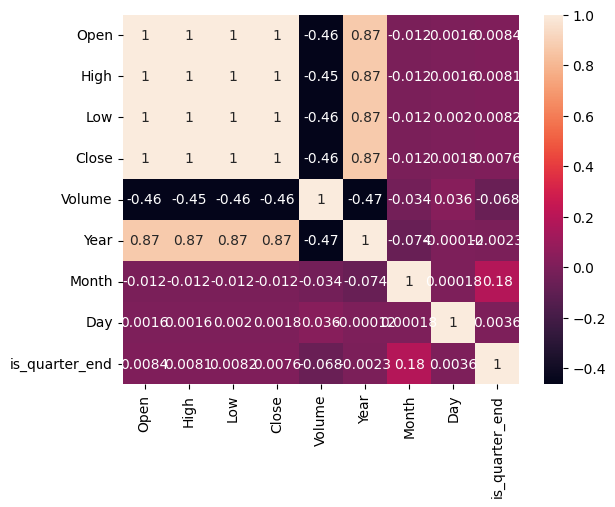

In [23]:
sns.heatmap(df.corr(),annot=True)

The heatmap shows that OHLS are highly correlated which is inherited. So, for prediction I gonna try that model which is robust with correlated columns

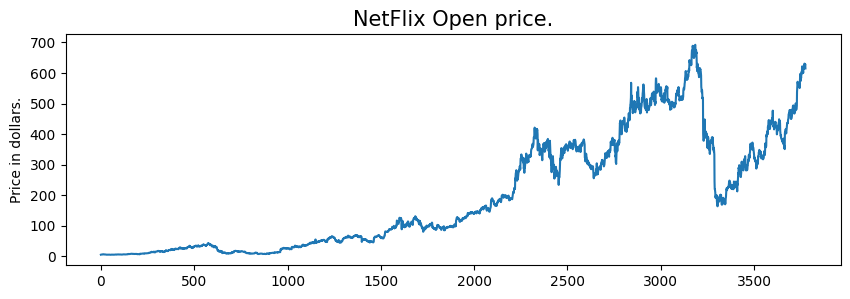

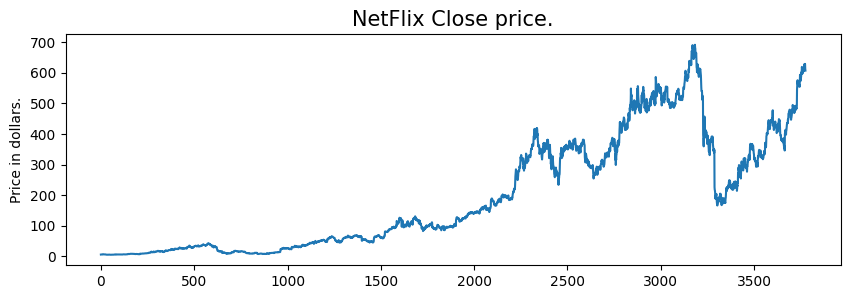

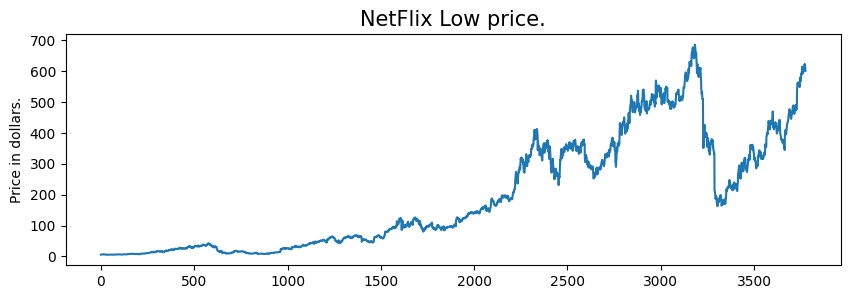

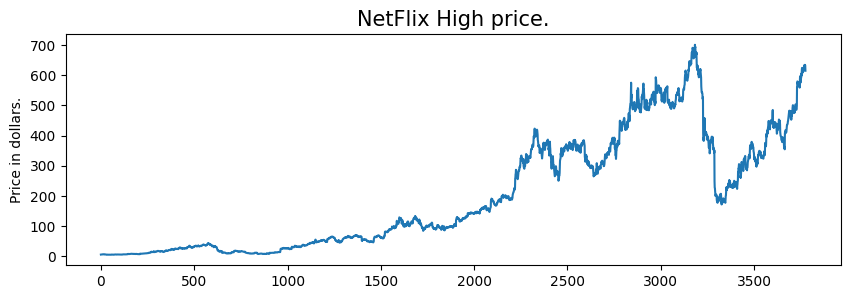

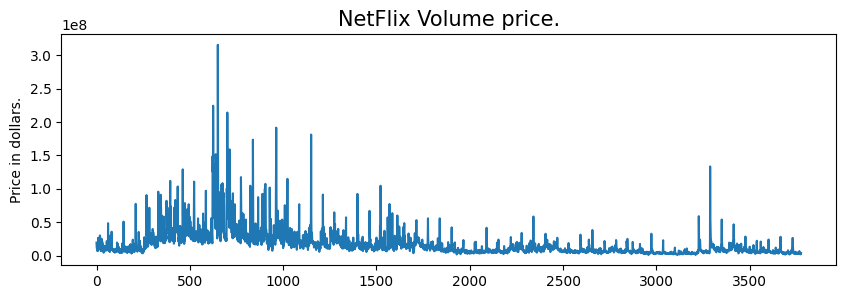

In [24]:
for col in ['Open','Close','Low','High','Volume']:
    plt.figure(figsize=(10,3))
    plt.plot(df[col])
    plt.title(f"NetFlix {col} price.", fontsize=15)
    plt.ylabel('Price in dollars.')
    plt.show()

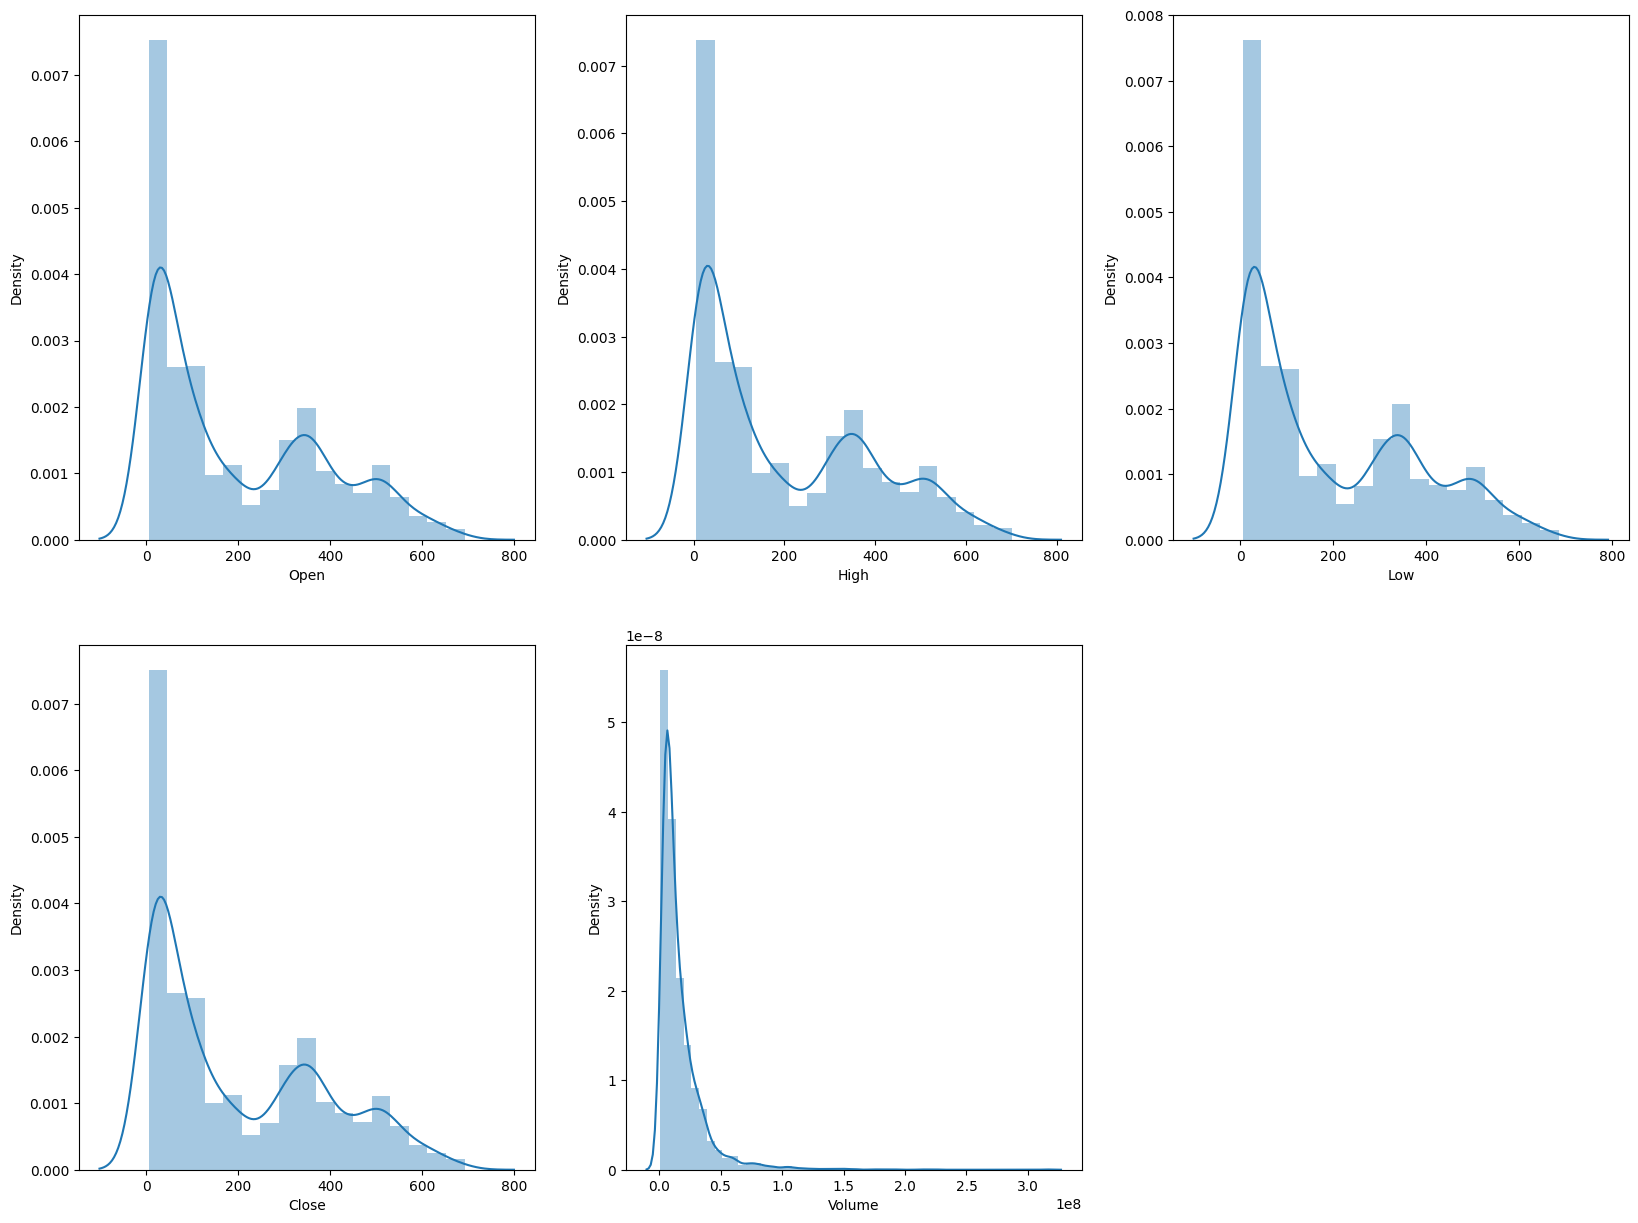

In [25]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,15))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sns.distplot(df[col])
plt.show()

In [26]:
df['Target'] = df['Close'].shift(-1)

In [27]:
X=df[:-1].drop(columns='Target')
y=df[:-1]['Target']

In [28]:
df.tail()

,Open,High,Low,Close,Volume,Year,Month,Day,is_quarter_end,Target
3771,624.159973,629.049988,621.000000,628.010010,2134100,2024,3,22,1,627.460022
3772,627.900024,630.460022,623.159973,627.460022,1803300,2024,3,25,1,629.239990
3773,625.200012,634.390015,619.179993,629.239990,2804500,2024,3,26,1,613.530029
3774,629.010010,631.349976,610.729980,613.530029,2628300,2024,3,27,1,607.330017
3775,614.989990,615.000000,601.590027,607.330017,3708800,2024,3,28,1,NaN


In [29]:
X.shape,y.shape

((3775, 9), (3775,))

### Data Preprocessing

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [31]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((2831, 9), (2831,), (944, 9), (944,))

In [32]:
scaler=StandardScaler()
X_train['Volume_scaled'] = scaler.fit_transform(X_train[['Volume']])
X_test['Volume_scaled']=scaler.transform(X_test[['Volume']])
minmaxO = MinMaxScaler()
X_train['Open_scaled']= minmaxO.fit_transform(X_train[['Open']])
X_test['Open_scaled']= minmaxO.transform(X_test[['Open']])

minmaxH = MinMaxScaler()
X_train['High_scaled']= minmaxH.fit_transform(X_train[['High']])
X_test['High_scaled']= minmaxH.transform(X_test[['High']])

minmaxL = MinMaxScaler()
X_train['Low_scaled']= minmaxL.fit_transform(X_train[['Low']])
X_test['Low_scaled']= minmaxL.transform(X_test[['Low']])

minmaxC = MinMaxScaler()
X_train['Close_scaled'] = minmaxC.fit_transform(X_train[['Close']])
X_test['Close_scaled'] = minmaxC.transform(X_test[['Close']])

In [33]:
X_train_scaled = X_train.drop(columns=['Volume','Open','High','Low','Close'])
X_test_scaled = X_test.drop(columns=['Volume','Open','High','Low','Close'])
X_train.drop(columns=['Volume_scaled','Open_scaled','High_scaled','Low_scaled','Close_scaled'],inplace=True)
X_test.drop(columns=['Volume_scaled','Open_scaled','High_scaled','Low_scaled','Close_scaled'],inplace=True)

In [34]:
X_train.head()

,Open,High,Low,Close,Volume,Year,Month,Day,is_quarter_end
2506,360.500000,363.839996,358.100006,358.820007,5271400,2019,3,14,1
2266,287.000000,295.350006,275.899994,295.350006,19145500,2018,3,29,1
3232,386.760010,387.000000,372.079987,384.359985,11966600,2022,1,28,0
2975,582.099976,583.989990,564.349976,565.169983,7550800,2021,1,22,0
124,6.735714,6.735714,6.597143,6.660000,3733800,2009,9,24,1


In [35]:
X_train_scaled.head()

,Year,Month,Day,is_quarter_end,Volume_scaled,Open_scaled,High_scaled,Low_scaled,Close_scaled
2506,2019,3,14,1,-0.615874,0.517518,0.522274,0.523187,0.517608
2266,2018,3,29,1,0.118246,0.410417,0.422490,0.401330,0.424679
3232,2022,1,28,0,-0.261611,0.555783,0.556017,0.543911,0.555003
2975,2021,1,22,0,-0.495264,0.840426,0.843016,0.828941,0.819735
124,2009,9,24,1,-0.697233,0.002025,0.002000,0.002103,0.001995


### Model Training and Evaluation

In [36]:
scaled_result_rmse=[]
result_rmse = []
scaled_result_r2=[]
result_r2 = []

In [37]:
# Non Scale data
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_rmse = mean_squared_error(y_test, lr_predictions, squared=False)
result_rmse.append(lr_rmse)
result_r2.append(r2_score(y_test,lr_predictions))

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
result_rmse.append(rf_rmse)
result_r2.append(r2_score(y_test,rf_predictions))

# Gradient Boosting Machines (GBM)
gbm_model = GradientBoostingRegressor(n_estimators=100, random_state=0)
gbm_model.fit(X_train, y_train)
gbm_predictions = gbm_model.predict(X_test)
gbm_rmse = mean_squared_error(y_test, gbm_predictions, squared=False)
result_rmse.append(gbm_rmse)
result_r2.append(r2_score(y_test,gbm_predictions))

#XGBoost
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train,y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_rmse = mean_squared_error(y_test, xgb_pred, squared=False)
result_rmse.append(xgb_rmse)
result_r2.append(r2_score(y_test,xgb_pred))



In [38]:
# Scale data
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)
lr_rmse = mean_squared_error(y_test, lr_predictions, squared=False)
scaled_result_rmse.append(lr_rmse)
scaled_result_r2.append(r2_score(y_test,lr_predictions))

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
scaled_result_rmse.append(rf_rmse)
scaled_result_r2.append(r2_score(y_test,rf_predictions))

# Gradient Boosting Machines (GBM)
gbm_model = GradientBoostingRegressor(n_estimators=100, random_state=0)
gbm_model.fit(X_train_scaled, y_train)
gbm_predictions = gbm_model.predict(X_test_scaled)
gbm_rmse = mean_squared_error(y_test, gbm_predictions, squared=False)
scaled_result_rmse.append(gbm_rmse)
scaled_result_r2.append(r2_score(y_test,gbm_predictions))

#XGBoost
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train_scaled,y_train)
xgb_pred = xgb_model.predict(X_test_scaled)
xgb_rmse = mean_squared_error(y_test, xgb_pred, squared=False)
scaled_result_rmse.append(xgb_rmse)
scaled_result_r2.append(r2_score(y_test,xgb_pred))


In [39]:
def Rmse(scores):
    Rmse = []
    for i in scores:
        Rmse.append(np.sqrt(-i))
    cv_rmse = np.mean(Rmse)
    return cv_rmse

In [40]:
from sklearn.model_selection import cross_val_score, KFold, TimeSeriesSplit
S = []
R = []
models = [LinearRegression(),RandomForestRegressor(),GradientBoostingRegressor(n_estimators=100, random_state=0),xgb.XGBRegressor()]
for model in models:
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    R_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    S.append(Rmse(scores))
    R.append(np.mean(R_scores))
S,R

([5.559102059539339,
  14.577323454207539,
  14.140391387096296,
  20.978561458491008],
 [0.9921772123304079, 0.9309911731465, 0.9380445316926828, 0.8201869953821836])

In [41]:
r = {
    "r2_score(scaled_version)":scaled_result_r2,
    "rmse(scaled_version)":scaled_result_rmse,
    "r2_score":result_r2,
    "rmse": result_rmse,
    "cv_score_mean_rmse":S,
    "cv_score_mean_r2":R,
}
Index = ["Linear Regression","Random Forest Regressor","Gradient Boosting Regressor","XGBoost Regressor"]
Result = pd.DataFrame(r,index = Index)
Result

,r2_score(scaled_version),rmse(scaled_version),r2_score,rmse,cv_score_mean_rmse,cv_score_mean_r2
Linear Regression,0.997597,9.287401,0.997597,9.287401,5.559102,0.992177
Random Forest Regressor,0.997267,9.904204,0.997240,9.952917,14.577323,0.930991
Gradient Boosting Regressor,0.997280,9.881317,0.997294,9.855347,14.140391,0.938045
XGBoost Regressor,0.996993,10.388769,0.996959,10.447718,20.978561,0.820187


According to result dataframe linear regression is doing better even without scalling. So going with linear regression....

In [42]:
#Again confirming is that any overfitting with linear regression even cvscore shows that its
tscv = TimeSeriesSplit(n_splits=5)
model = LinearRegression()
# Apply cross-validation with custom scoring functions
mse_scores = cross_val_score(model, X, y, cv=tscv, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(model, X, y, cv=tscv, scoring='r2')

# Interpret Results
print("Mean RMSE:", np.sqrt(-mse_scores.mean()))
print("Mean R2 Score:", r2_scores.mean())

Mean RMSE: 7.806722036332083
Mean R2 Score: 0.9917414283001513


In [43]:
# even though Linear Regression is performing very well, just trying
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(LSTM(units=50, return_sequences=False))
lstm_model.add(Dense(units=16))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(units=1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 9, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 16)                816       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 31433 (122.79 KB)
Trainable params: 31433 (122.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
lstm_model.fit(X_train, y_train, epochs=100,batch_size=32)

lstm_predictions = lstm_model.predict(X_test)
lstm_rmse = mean_squared_error(y_test, lstm_predictions, squared=False)

Epoch 1/100
89/89 [==============================] - 15s 18ms/step - loss: 68499.9141
Epoch 2/100
89/89 [==============================] - 2s 19ms/step - loss: 54701.4805
Epoch 3/100
89/89 [==============================] - 2s 21ms/step - loss: 43031.1172
Epoch 4/100
89/89 [==============================] - 2s 25ms/step - loss: 38441.6602
Epoch 5/100
89/89 [==============================] - 2s 26ms/step - loss: 28389.8066
Epoch 6/100
89/89 [==============================] - 2s 24ms/step - loss: 14538.4229
Epoch 7/100
89/89 [==============================] - 2s 23ms/step - loss: 9850.2461
Epoch 8/100
89/89 [==============================] - 3s 30ms/step - loss: 8127.6621
Epoch 9/100
89/89 [==============================] - 2s 26ms/step - loss: 6471.8496
Epoch 10/100
89/89 [==============================] - 3s 29ms/step - loss: 5765.9561
Epoch 11/100
89/89 [==============================] - 2s 24ms/step - loss: 5640.9585
Epoch 12/100
89/89 [==============================] - 2s 22ms/step 

In [ ]:
lstm_rmse

30.834511952159293

In [ ]:
y_test = np.array(y_test)

In [ ]:
predictions =  {"Linear Regression":lr_predictions,
         "Random Forest Regressor":rf_predictions,
         "Gradient Boosting Regressor":gbm_predictions,
         "XGBoost Regressor":xgb_pred,
         'LSTM':lstm_predictions}


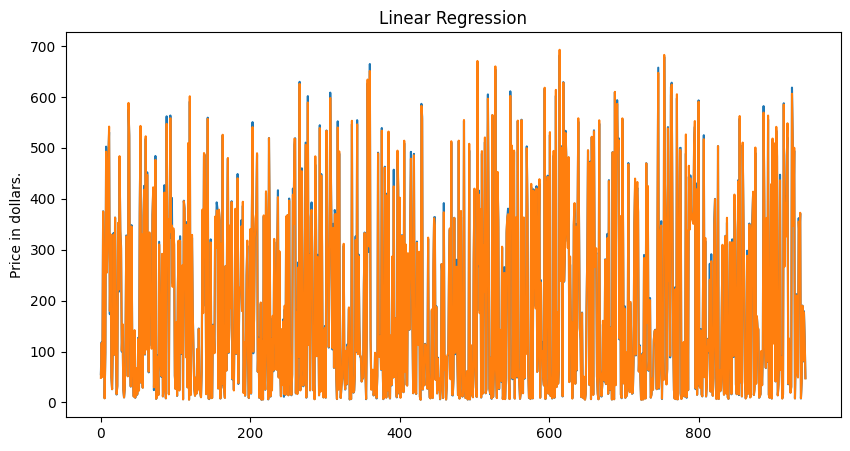

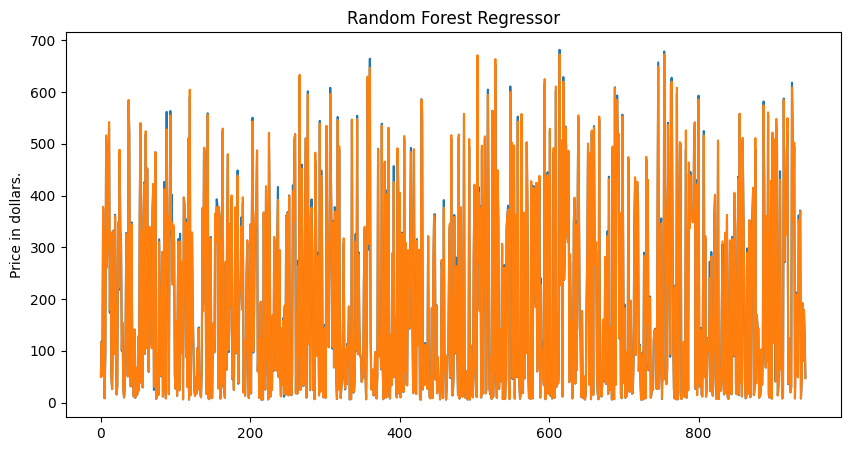

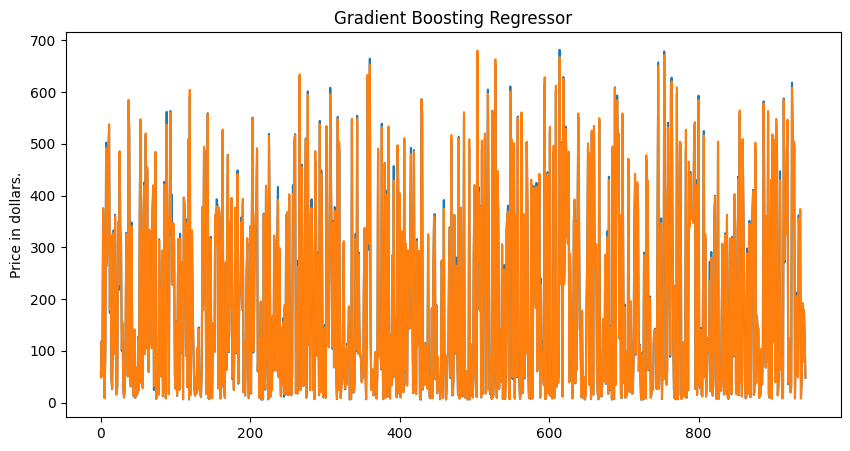

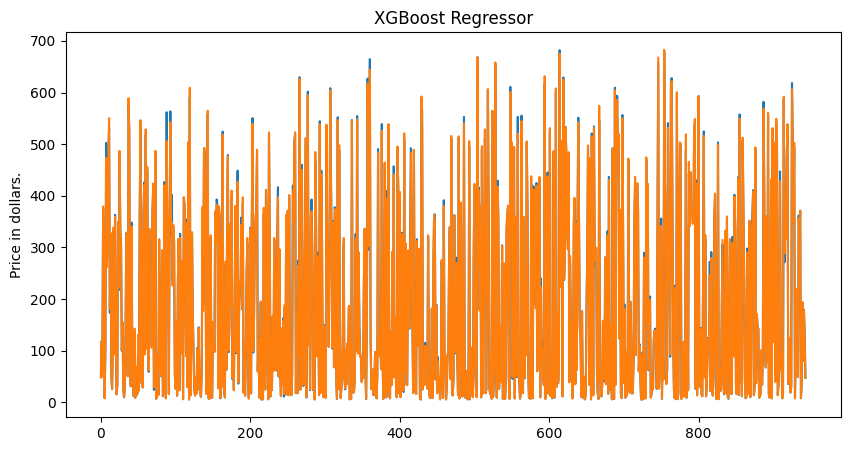

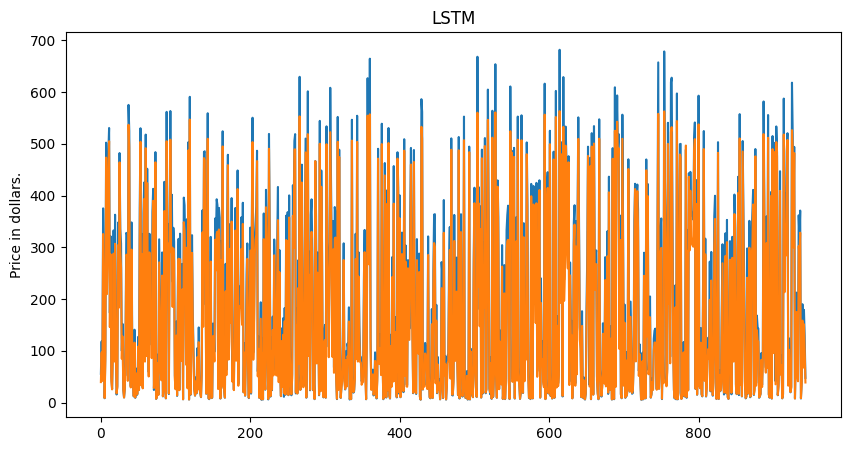

In [ ]:
for l,pred in predictions.items():
    plt.figure(figsize=(10,5))
    plt.plot(y_test)
    plt.plot(pred)
    plt.title(l)
    plt.ylabel('Price in dollars.')
    plt.show()

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)


0.9989656964922228

In [ ]:
input = np.array([614.989990,615.000000,601.590027,607.330017,3708803,2024,3,28 ,1])

In [ ]:
model.predict([input])

array([607.32968646])